In [1]:
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster

# Warnings configuration
# ==============================================================================
import warnings
# warnings.filterwarnings('ignore')

import datetime

C:\ProgramData\miniconda3\envs\dsi-sg\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_west = pd.read_csv('../data/df_west_merge.csv')

In [3]:
df_west

,Unnamed: 0,yr,week,region,no_cases,total_daily_rainfall,max_wind_sp,max_temp,rainy_day,mean_temp,...,mosquito,insect_repellent,dengue_fever_diff,dengue_fever_2nd_diff,dengue_diff,dengue_2nd_diff,mosquito_diff,mosquito_2nd_diff,insect_repellent_diff,insect_repellent_2nd_diff
0,0,2013,21,West,90,153.8,53.3,34.3,1,28.3,...,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2013,22,West,93,91.9,72.7,34.7,1,28.4,...,9.0,3.0,-4.0,0.0,-2.0,0.0,-1.0,0.0,1.0,0.0
2,2,2013,23,West,120,562.1,63.4,35.4,1,28.5,...,18.0,4.0,27.0,31.0,24.0,26.0,9.0,10.0,1.0,0.0
3,3,2013,24,West,239,51.5,67.3,34.7,1,30.0,...,14.0,2.0,-14.0,-41.0,-13.0,-37.0,-4.0,-13.0,-2.0,-3.0
4,4,2013,25,West,286,0.0,56.9,35.0,0,30.1,...,8.0,2.0,-17.0,-3.0,-16.0,-3.0,-6.0,-2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,387,2020,41,West,120,546.0,87.4,33.5,1,27.9,...,10.0,3.0,1.0,3.0,2.0,4.0,0.0,-1.0,0.0,1.0
388,388,2020,42,West,120,93.0,73.5,33.8,1,28.8,...,8.0,3.0,-2.0,-3.0,-1.0,-3.0,-2.0,-2.0,0.0,0.0
389,389,2020,43,West,120,233.2,70.6,34.3,1,28.2,...,10.0,2.0,-1.0,1.0,-2.0,-1.0,2.0,4.0,-1.0,-1.0
390,390,2020,44,West,120,379.7,65.9,34.4,1,28.2,...,6.0,1.0,-1.0,0.0,-1.0,1.0,-4.0,-6.0,-1.0,0.0


In [4]:
df_west.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 392 non-null    int64  
 1   yr                         392 non-null    int64  
 2   week                       392 non-null    int64  
 3   region                     392 non-null    object 
 4   no_cases                   392 non-null    int64  
 5   total_daily_rainfall       392 non-null    float64
 6   max_wind_sp                392 non-null    float64
 7   max_temp                   392 non-null    float64
 8   rainy_day                  392 non-null    int64  
 9   mean_temp                  392 non-null    float64
 10  mean_wind_sp               392 non-null    float64
 11  min_temp                   392 non-null    float64
 12  dengue_fever               392 non-null    float64
 13  dengue                     392 non-null    float64

In [5]:
df_west['index'] = df_west['yr'] * 100 + df_west['week']
df_west.tail()

,Unnamed: 0,yr,week,region,no_cases,total_daily_rainfall,max_wind_sp,max_temp,rainy_day,mean_temp,...,insect_repellent,dengue_fever_diff,dengue_fever_2nd_diff,dengue_diff,dengue_2nd_diff,mosquito_diff,mosquito_2nd_diff,insect_repellent_diff,insect_repellent_2nd_diff,index
387,387,2020,41,West,120,546.0,87.4,33.5,1,27.9,...,3.0,1.0,3.0,2.0,4.0,0.0,-1.0,0.0,1.0,202041
388,388,2020,42,West,120,93.0,73.5,33.8,1,28.8,...,3.0,-2.0,-3.0,-1.0,-3.0,-2.0,-2.0,0.0,0.0,202042
389,389,2020,43,West,120,233.2,70.6,34.3,1,28.2,...,2.0,-1.0,1.0,-2.0,-1.0,2.0,4.0,-1.0,-1.0,202043
390,390,2020,44,West,120,379.7,65.9,34.4,1,28.2,...,1.0,-1.0,0.0,-1.0,1.0,-4.0,-6.0,-1.0,0.0,202044
391,391,2020,45,West,243,329.8,69.1,34.9,1,27.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202045


In [6]:
df_west.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 392 non-null    int64  
 1   yr                         392 non-null    int64  
 2   week                       392 non-null    int64  
 3   region                     392 non-null    object 
 4   no_cases                   392 non-null    int64  
 5   total_daily_rainfall       392 non-null    float64
 6   max_wind_sp                392 non-null    float64
 7   max_temp                   392 non-null    float64
 8   rainy_day                  392 non-null    int64  
 9   mean_temp                  392 non-null    float64
 10  mean_wind_sp               392 non-null    float64
 11  min_temp                   392 non-null    float64
 12  dengue_fever               392 non-null    float64
 13  dengue                     392 non-null    float64

In [7]:
# convert the integer column to a datetime index
df_west['index'] = pd.to_datetime(df_west['index'].astype(str) + '-0', format='%Y%W-%w')

In [8]:
df_west.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0                 392 non-null    int64         
 1   yr                         392 non-null    int64         
 2   week                       392 non-null    int64         
 3   region                     392 non-null    object        
 4   no_cases                   392 non-null    int64         
 5   total_daily_rainfall       392 non-null    float64       
 6   max_wind_sp                392 non-null    float64       
 7   max_temp                   392 non-null    float64       
 8   rainy_day                  392 non-null    int64         
 9   mean_temp                  392 non-null    float64       
 10  mean_wind_sp               392 non-null    float64       
 11  min_temp                   392 non-null    float64       
 12  dengue_f

In [9]:
#df_west = df_west.rename(columns={'index': 'date'})
#df_west = df_west.drop_duplicates(subset='date')
df_west = df_west.set_index('index')
df_west.tail()

,Unnamed: 0,yr,week,region,no_cases,total_daily_rainfall,max_wind_sp,max_temp,rainy_day,mean_temp,...,mosquito,insect_repellent,dengue_fever_diff,dengue_fever_2nd_diff,dengue_diff,dengue_2nd_diff,mosquito_diff,mosquito_2nd_diff,insect_repellent_diff,insect_repellent_2nd_diff
index,,,,,,,,,,,,,,,,,,,,,
2020-10-18,387,2020,41,West,120,546.0,87.4,33.5,1,27.9,...,10.0,3.0,1.0,3.0,2.0,4.0,0.0,-1.0,0.0,1.0
2020-10-25,388,2020,42,West,120,93.0,73.5,33.8,1,28.8,...,8.0,3.0,-2.0,-3.0,-1.0,-3.0,-2.0,-2.0,0.0,0.0
2020-11-01,389,2020,43,West,120,233.2,70.6,34.3,1,28.2,...,10.0,2.0,-1.0,1.0,-2.0,-1.0,2.0,4.0,-1.0,-1.0
2020-11-08,390,2020,44,West,120,379.7,65.9,34.4,1,28.2,...,6.0,1.0,-1.0,0.0,-1.0,1.0,-4.0,-6.0,-1.0,0.0
2020-11-15,391,2020,45,West,243,329.8,69.1,34.9,1,27.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df_west = df_west.loc[~df_west.index.duplicated(), :]

In [11]:
df_west.index.is_unique

True

In [18]:
df_west = df_west.asfreq('W')
print(df_west.index.dtype)
df_west.tail()

datetime64[ns]


,Unnamed: 0,yr,week,region,no_cases,total_daily_rainfall,max_wind_sp,max_temp,rainy_day,mean_temp,...,mosquito,insect_repellent,dengue_fever_diff,dengue_fever_2nd_diff,dengue_diff,dengue_2nd_diff,mosquito_diff,mosquito_2nd_diff,insect_repellent_diff,insect_repellent_2nd_diff
index,,,,,,,,,,,,,,,,,,,,,
2020-10-18,387.0,2020.0,41.0,West,120.0,546.0,87.4,33.5,1.0,27.9,...,10.0,3.0,1.0,3.0,2.0,4.0,0.0,-1.0,0.0,1.0
2020-10-25,388.0,2020.0,42.0,West,120.0,93.0,73.5,33.8,1.0,28.8,...,8.0,3.0,-2.0,-3.0,-1.0,-3.0,-2.0,-2.0,0.0,0.0
2020-11-01,389.0,2020.0,43.0,West,120.0,233.2,70.6,34.3,1.0,28.2,...,10.0,2.0,-1.0,1.0,-2.0,-1.0,2.0,4.0,-1.0,-1.0
2020-11-08,390.0,2020.0,44.0,West,120.0,379.7,65.9,34.4,1.0,28.2,...,6.0,1.0,-1.0,0.0,-1.0,1.0,-4.0,-6.0,-1.0,0.0
2020-11-15,391.0,2020.0,45.0,West,243.0,329.8,69.1,34.9,1.0,27.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
missing_values = df_west.isnull()
rows_with_missing_values = missing_values.any(axis=1)
print(df_west[rows_with_missing_values])

            Unnamed: 0  yr  week region  no_cases  total_daily_rainfall  \
index                                                                     
2019-01-06         NaN NaN   NaN    NaN       NaN                   NaN   

            max_wind_sp  max_temp  rainy_day  mean_temp  ...  mosquito  \
index                                                    ...             
2019-01-06          NaN       NaN        NaN        NaN  ...       NaN   

            insect_repellent  dengue_fever_diff  dengue_fever_2nd_diff  \
index                                                                    
2019-01-06               NaN                NaN                    NaN   

            dengue_diff  dengue_2nd_diff  mosquito_diff  mosquito_2nd_diff  \
index                                                                        
2019-01-06          NaN              NaN            NaN                NaN   

            insect_repellent_diff  insect_repellent_2nd_diff  
index                         

In [20]:
df_west = df_west.fillna(method='ffill')

In [21]:
missing_values = df_west.isnull()
rows_with_missing_values = missing_values.any(axis=1)
print(df_west[rows_with_missing_values])

Empty DataFrame
Columns: [Unnamed: 0, yr, week, region, no_cases, total_daily_rainfall, max_wind_sp, max_temp, rainy_day, mean_temp, mean_wind_sp, min_temp, dengue_fever, dengue, mosquito, insect_repellent, dengue_fever_diff, dengue_fever_2nd_diff, dengue_diff, dengue_2nd_diff, mosquito_diff, mosquito_2nd_diff, insect_repellent_diff, insect_repellent_2nd_diff]
Index: []

[0 rows x 24 columns]


In [22]:
df_west = df_west.sort_index()
df_west.tail()

,Unnamed: 0,yr,week,region,no_cases,total_daily_rainfall,max_wind_sp,max_temp,rainy_day,mean_temp,...,mosquito,insect_repellent,dengue_fever_diff,dengue_fever_2nd_diff,dengue_diff,dengue_2nd_diff,mosquito_diff,mosquito_2nd_diff,insect_repellent_diff,insect_repellent_2nd_diff
index,,,,,,,,,,,,,,,,,,,,,
2020-10-18,387.0,2020.0,41.0,West,120.0,546.0,87.4,33.5,1.0,27.9,...,10.0,3.0,1.0,3.0,2.0,4.0,0.0,-1.0,0.0,1.0
2020-10-25,388.0,2020.0,42.0,West,120.0,93.0,73.5,33.8,1.0,28.8,...,8.0,3.0,-2.0,-3.0,-1.0,-3.0,-2.0,-2.0,0.0,0.0
2020-11-01,389.0,2020.0,43.0,West,120.0,233.2,70.6,34.3,1.0,28.2,...,10.0,2.0,-1.0,1.0,-2.0,-1.0,2.0,4.0,-1.0,-1.0
2020-11-08,390.0,2020.0,44.0,West,120.0,379.7,65.9,34.4,1.0,28.2,...,6.0,1.0,-1.0,0.0,-1.0,1.0,-4.0,-6.0,-1.0,0.0
2020-11-15,391.0,2020.0,45.0,West,243.0,329.8,69.1,34.9,1.0,27.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
print(f'Number of rows with missing values: {df_west.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.0


In [24]:
# Verify that a temporary index is complete
# ==============================================================================
(df_west.index == pd.date_range(start=df_west.index.min(),
                             end=df_west.index.max(),
                             freq=df_west.index.freq)).all()

True

In [25]:
df_west = df_west.drop(['Unnamed: 0','yr','week','region'],axis =1)
df_west

,no_cases,total_daily_rainfall,max_wind_sp,max_temp,rainy_day,mean_temp,mean_wind_sp,min_temp,dengue_fever,dengue,mosquito,insect_repellent,dengue_fever_diff,dengue_fever_2nd_diff,dengue_diff,dengue_2nd_diff,mosquito_diff,mosquito_2nd_diff,insect_repellent_diff,insect_repellent_2nd_diff
index,,,,,,,,,,,,,,,,,,,,
2013-06-02,90.0,153.8,53.3,34.3,1.0,28.3,6.627778,23.1,33.0,30.0,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-06-09,93.0,91.9,72.7,34.7,1.0,28.4,6.977778,22.9,29.0,28.0,9.0,3.0,-4.0,0.0,-2.0,0.0,-1.0,0.0,1.0,0.0
2013-06-16,120.0,562.1,63.4,35.4,1.0,28.5,7.022222,22.4,56.0,52.0,18.0,4.0,27.0,31.0,24.0,26.0,9.0,10.0,1.0,0.0
2013-06-23,239.0,51.5,67.3,34.7,1.0,30.0,9.268254,23.6,42.0,39.0,14.0,2.0,-14.0,-41.0,-13.0,-37.0,-4.0,-13.0,-2.0,-3.0
2013-06-30,286.0,0.0,56.9,35.0,0.0,30.1,8.660317,23.6,25.0,23.0,8.0,2.0,-17.0,-3.0,-16.0,-3.0,-6.0,-2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-18,120.0,546.0,87.4,33.5,1.0,27.9,9.870270,23.2,10.0,10.0,10.0,3.0,1.0,3.0,2.0,4.0,0.0,-1.0,0.0,1.0
2020-10-25,120.0,93.0,73.5,33.8,1.0,28.8,9.831429,22.9,8.0,9.0,8.0,3.0,-2.0,-3.0,-1.0,-3.0,-2.0,-2.0,0.0,0.0
2020-11-01,120.0,233.2,70.6,34.3,1.0,28.2,9.202857,22.7,7.0,7.0,10.0,2.0,-1.0,1.0,-2.0,-1.0,2.0,4.0,-1.0,-1.0


Train dates : 2013-06-02 00:00:00 --- 2018-05-20 00:00:00  (n=260)
Test dates  : 2018-05-27 00:00:00 --- 2020-11-15 00:00:00  (n=130)


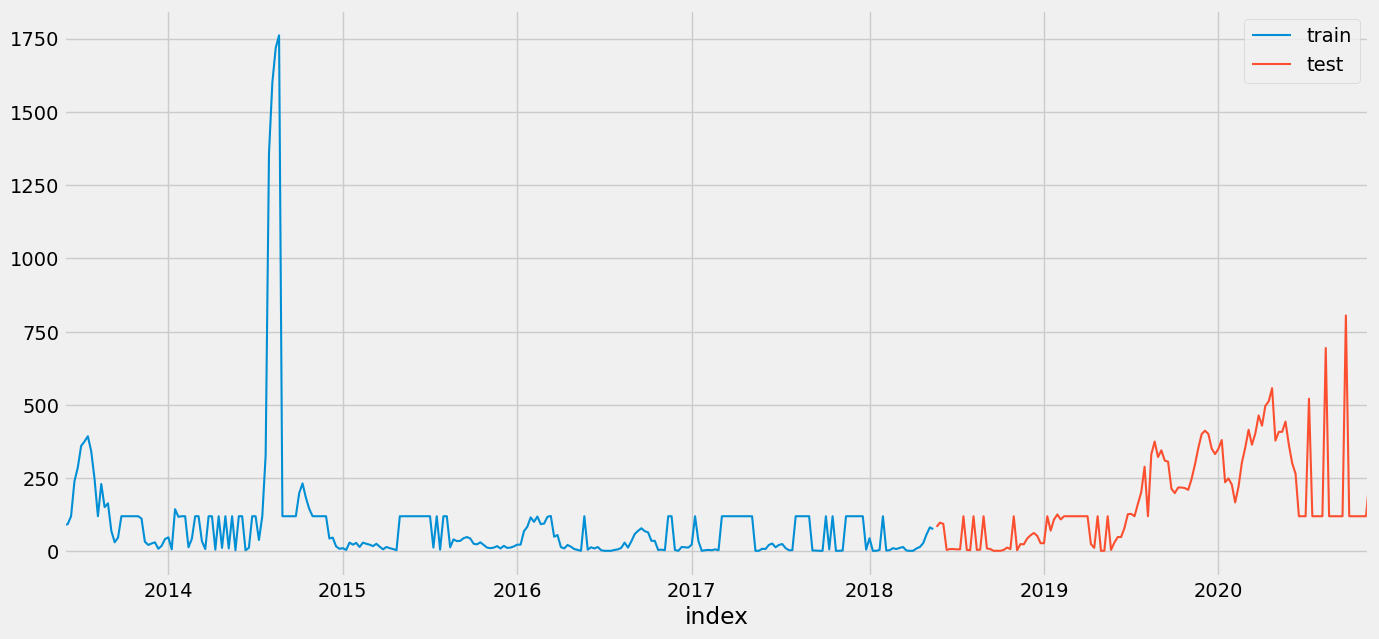

In [26]:
# Split data into train-test
# ==============================================================================
steps = 130
df_west_train = df_west[:-steps]
df_west_test  = df_west[-steps:]

print(f"Train dates : {df_west_train.index.min()} --- {df_west_train.index.max()}  (n={len(df_west_train)})")
print(f"Test dates  : {df_west_test.index.min()} --- {df_west_test.index.max()}  (n={len(df_west_test)})")

fig, ax = plt.subplots(figsize=(15, 7))
df_west_train['no_cases'].plot(ax=ax, label='train')
df_west_test['no_cases'].plot(ax=ax, label='test')
ax.legend();


ForecasterAutoreg   

With the ForecasterAutoreg class, a model is created and trained from a RandomForestRegressor regressor with a time window of 12 lags.

In [27]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12
             )

forecaster.fit(y=df_west_train['no_cases'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
Transformer for y: None 
Transformer for exog: None 
Window size: 12 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2013-06-02 00:00:00'), Timestamp('2018-05-20 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: W-SUN 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2023-04-20 18:05:09 
Last fit date: 2023-04-20 18:05:10 
Skforecast version: 0.7.0 
Python version: 3.11.0 
Forecaster

In [28]:
# Predictions
# ==============================================================================
steps = 130
predictions = forecaster.predict(steps=steps)
predictions.head(5)

2018-05-27    70.82
2018-06-03    69.21
2018-06-10    64.96
2018-06-17    51.94
2018-06-24    58.41
Freq: W-SUN, Name: pred, dtype: float64

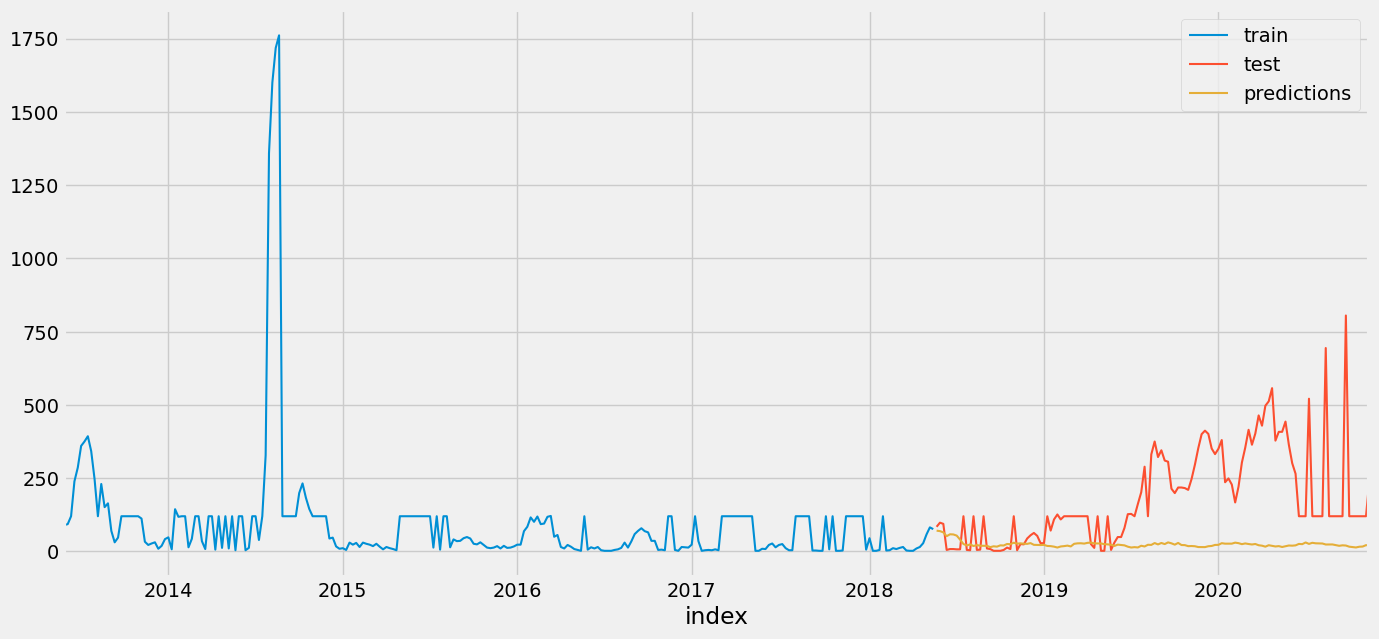

In [29]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(15, 7))
df_west_train['no_cases'].plot(ax=ax, label='train')
df_west_test['no_cases'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();
ax.set_xlim(df_west.index.min(), df_west.index.max());

The error that the model makes in its predictions is quantified. In this case, the metric used is the mean squared error (mse).

In [30]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = df_west_test['no_cases'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 50798.07722384615


There could be several reasons why the MSE value is high:

Overfitting: If the model is overfitting to the training data, it will not generalize well to the test data. This can result in high MSE values on the test data. To avoid overfitting, you can try regularization techniques or use a simpler model.

Underfitting: If the model is too simple and not able to capture the underlying patterns in the data, it will perform poorly on both the training and test data. This can result in high MSE values on the test data. To avoid underfitting, you can try using a more complex model or adding more features to the model.

Data quality: If the test data is of poor quality, the model will not be able to make accurate predictions. This can result in high MSE values on the test data. To avoid this, you can try cleaning the test data or collecting more high-quality data.

Data distribution: If the test data is significantly different from the training data in terms of its distribution, the model may not be able to make accurate predictions. This can result in high MSE values on the test data. To avoid this, you can try collecting more diverse training data or using data augmentation techniques.

I

Hyperparameter tuning
he trained ForecasterAutoreg uses a 12 lag time window and a Random Forest model with the default hyperparameters. However, there is no reason why these values are the most suitable. In order to identify the best combination of lags and hyperparameters, the Skforecast library provides the grid_search_forecaster function. It compares the results obtained with each model configuration.



In [34]:
# Hyperparameter Grid search
# ==============================================================================
steps = 130
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [1,3,6,10,15, 20]

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = df_west_train['no_cases'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(df_west_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 36.


loop lags_grid: 100%|███████████████████████████████████████| 6/6 [01:38<00:00, 16.48s/it]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1] 
  Parameters: {'max_depth': 3, 'n_estimators': 100}
  Backtesting metric: 2294.949882043304



In [35]:
# Grid Search results
# ==============================================================================
results_grid

,lags,params,mean_squared_error,max_depth,n_estimators
0,[1],"{'max_depth': 3, 'n_estimators': 100}",2294.949882,3,100
1,[1],"{'max_depth': 3, 'n_estimators': 500}",2302.699485,3,500
19,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 500}",2315.464600,3,500
25,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 500}",2332.060528,3,500
24,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 100}",2332.873686,3,100
7,"[1, 2, 3]","{'max_depth': 3, 'n_estimators': 500}",2369.994999,3,500
6,"[1, 2, 3]","{'max_depth': 3, 'n_estimators': 100}",2379.468829,3,100
13,"[1, 2, 3, 4, 5, 6]","{'max_depth': 3, 'n_estimators': 500}",2388.374729,3,500
12,"[1, 2, 3, 4, 5, 6]","{'max_depth': 3, 'n_estimators': 100}",2408.245389,3,100
31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 500}",2480.556177,3,500


The best results are obtained using a time window of 1 lags and a Random Forest set up of {'max_depth': 3, 'n_estimators': 100}.

In [38]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=100, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 1
             )

forecaster.fit(y=df_west_train['no_cases'])

In [39]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=steps)

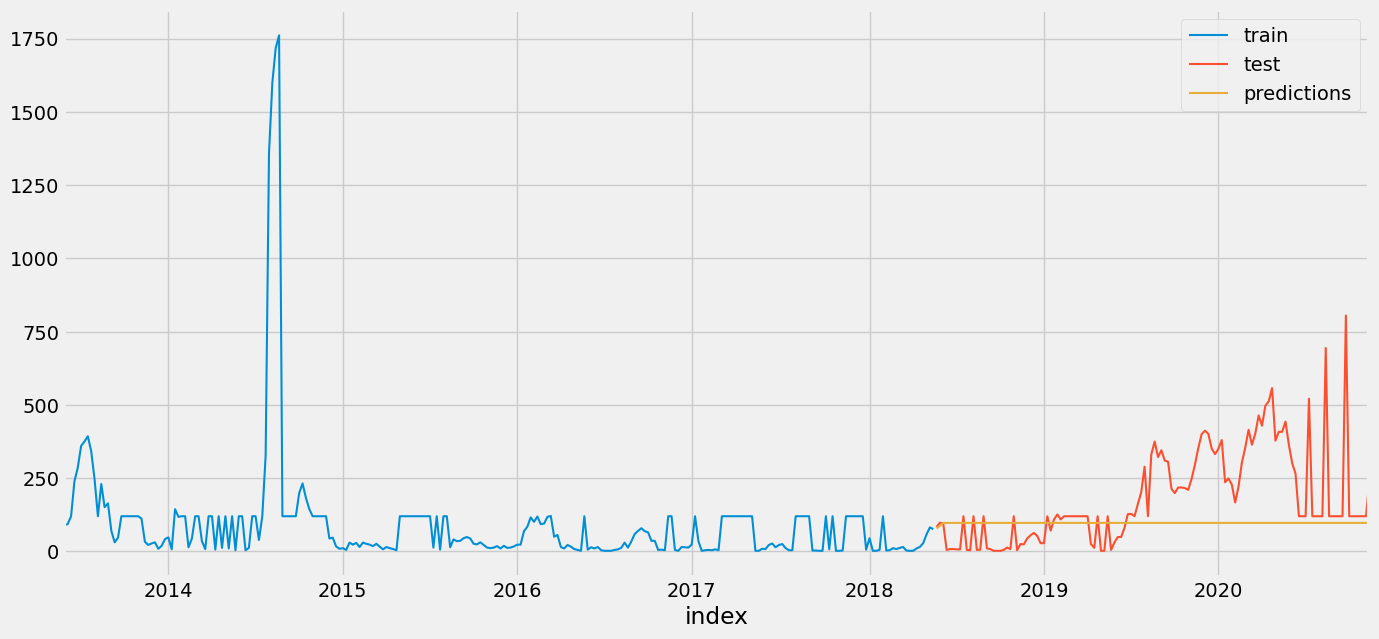

In [41]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(15, 7))
df_west_train['no_cases'].plot(ax=ax, label='train')
df_west_test['no_cases'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [42]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = df_west_test['no_cases'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 32428.75825229692
